# Polynomial Lagrange

:::{prf:definition}
:label: def-poly_lagrange
Diberikan $n+1$ titik $(x_0, y_0), (x_1, x_1), \cdots, (x_n, y_n)$. **Fungsi kardinal** $l_0, l_1, \cdots, l_{n} \in \mathcal{P}^{n}$ (polynomial berderajat $n$), dimana

$$
\label{kronecker_delta}
l_i(x_j) = \delta_{ij} =
\begin{cases}
1, \hspace{1em} i = j \\
0, \hspace{1em} i \neq j
\end{cases}
$$

untuk $i = 0, 1, \cdots, n$. Bentuk **polynomial Lagrange** adalah

$$
\label{poly_Lagrange}
P_n(x) = \sum_{i=0}^{n} l_i(x)\cdot y_i
$$
:::

Kita periksa sifat interpolasi:

$$
P_n(x_j) = \sum_{i=0}^{n} l_i(x_j)\cdot y_i = y_j, \hspace{1em} \forall j.
$$

$l_i(x)$ dapat dituliskan sebagai

$$
\begin{align*}
l_i(x) &= \prod_{j=0, j\neq i}^{n} \left( \frac{x - x_j}{x_i - x_j} \right) \\
&= \frac{x - x_0}{x_i - x_0} \cdot \frac{x - x_1}{x_i - x_1} \cdots \frac{x - x_{i-1}}{x_i - x_{i-1}} \cdot \frac{x - x_{i+1}}{x_i - x_{i+1}} \cdots \frac{x - x_n}{x_i - x_n}
\end{align*}
$$

(contoh1)=
## Contoh 1

```{list-table} Titik data
:header-rows: 1
:name: example1-table

* - $x_i$
  - $y_i$
* - 0
  - 1
* - 1
  - 0
* - 2/3
  - 0.5
```

dengan menggunakan polynomial Lagrange kita dapatkan

:::{tip} Jawaban
:class: dropdown
$$
\begin{align*}
l_0(x) &= \frac{\frac{x-2}{3}}{\frac{0-2}{3}} \cdot \frac{x-1}{0-1} = \frac{3}{2} \left( x - \frac{2}{3} \right) \left( x - 1 \right) \\
l_1(x) &= \frac{x-0}{2/3 - 0} \cdot \frac{x-1}{2/3 - 1} = -\frac{9}{2} x \left( x - 1 \right) \\
l_2(x) &= \frac{x-0}{1 - 0} \cdot \frac{x-2/3}{1-2/3} = -3x \left( x - \frac{2}{3} \right) \\
\end{align*}
$$

jadi

$$
\begin{align*}
P_2(x) &= l_0(x)y_0 + l_1(x)y_1 + l_2(x)y_2 \\
&= \frac{3}{2} \left( x - \frac{2}{3}\right) (x-1) - \frac{9}{2}x (x - 1) (0.5) + 0 \\
&= -\frac{3}{4} x^2 - \frac{1}{4}x + 1.
\end{align*}
$$
:::

## Bentuk matriks pada interpolasi Lagrange

Fungsi kardinal pada interpolasi Lagrange didefinisikan oleh [](#kronecker_delta) sehingga membentuk suatu matriks

$$
\label{matriks_Langrange}
V =
\begin{bmatrix}
l_0(x_0) & l_1(x_0) & \cdots & l_n(x_0) \\
l_0(x_1) & l_1(x_1) & \cdots & l_n(x_1) \\
\vdots & \vdots & \ddots & \vdots \\
l_0(x_n) & l_1(x_n) & \cdots & l_n(x_n) \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1 \\
\end{bmatrix}
$$

dimana $V \in \mathbb{R}^{(n+1) \times (n+1)}$. Dari sini kita dapat membuat persamaan matriks-vektor 

$$
\label{pers_matriks_Lagrange}
V\textbf{a} = \textbf{y}.
$$

Untuk mencari koefisien $\textbf{a}$, kita tinggal mencari invers dari $V$ lalu dikali dengan $\textbf{y}$ atau dapat ditulis

$$
\textbf{a} = V^{-1} \textbf{y}.
$$

Fungsi polynomial Lagrange dapat dicari dengan menggunakan [](#poly_Lagrange).

## Kekurangan interpolasi Lagrange

Terdapat beberapa kekurangan interpolasi Lagrange, antara lain:
- Lambat untuk dihitung, setiap $l_i(x)$ berbeda,
- Tidak fleksibel: jika kita ganti/tambahkan titik data baru, kita harus menghitung ulang semua $l_i$ nya 



## Pseudo-code Interpolasi Lagrange

:::{prf:algorithm} Polynomial Lagrange
:label: poly-lagrange

**INPUT**: Titik data $(x_0, y_0), (x_1, y_1), \cdots, (x_n, y_n)$

**OUTPUT**: Polynomial Lagrange berderajat-$n$

1. **For** setiap titik $(x_i, y_i)$ 
    
    2. **hitung** `tmp` = $y_i / \prod_{j \neq i} (x_i - x_j)$
    3. **hitung** $l(x)$ = `tmp` * $\left( \prod_{j \neq i} (x - x_j)\right)$
    
4. **end**
:::

## Implementasi di Julia

Dari [](#contoh1) kita implementasikan menggunakan Julia

In [1]:
using Plots
using Polynomials
using LaTeXStrings

In [2]:
x = [0, 1, 2/3]
l0(x) = (x - 2/3) * (x - 1)
l1(x) = -9/2 * x * (x - 1)
l2(x) = -3 * x * (x - 2/3);

In [3]:
xx = range(0, 1, length=100)
y_l0 = [l0(xx[i]) for i in 1:length(xx)]
y_l1 = [l1(xx[i]) for i in 1:length(xx)]
y_l2 = [l2(xx[i]) for i in 1:length(xx)];

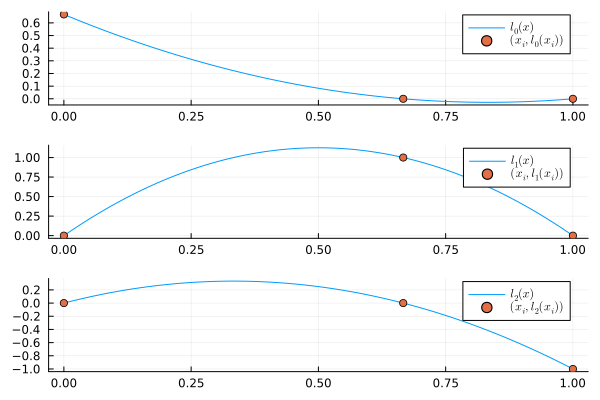

In [4]:
p1 = plot(xx, y_l0, label=L"l_0(x)")
p1_1 = scatter!(x, [l0(x[i]) for i in 1:length(x)], label = L"(x_i, l_0(x_i))")
p2 = plot(xx, y_l1, label=L"l_1(x)")
p2_1 = scatter!(x, [l1(x[i]) for i in 1:length(x)], label = L"(x_i, l_1(x_i))")
p3 = plot(xx, y_l2, label=L"l_2(x)")
p2_1 = scatter!(x, [l2(x[i]) for i in 1:length(x)], label = L"(x_i, l_2(x_i))")

plot(p1, p2, p3, layout=(3,1))


In [5]:
function Lagrange_basis(x_data)
    n = length(x_data)
    L = zeros(n, n)
    for i in 1:n
        for j in 1:n
            if i == j
                L[i, j] = 1.0
            else 
                L[i, j] = 0.0
            end
        end
    end
    return L
end

Lagrange_basis (generic function with 1 method)

In [6]:
function poly_Lagrange(x, x_data, koef)
    n = length(x_data)
    hasil = 0.0
    for i in 1:n
        term = koef[i]
        for j in 1:n
            if i != j
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
            end
        end
        hasil += term
    end
    return hasil
end

poly_Lagrange (generic function with 1 method)

In [7]:
x = [0, 1, 2/3]
y = [1, 0, 0.5]

V = Lagrange_basis(x)
V

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [8]:
# Koefisien a
a = V \ y
a

3-element Vector{Float64}:
 1.0
 0.0
 0.5

In [9]:
p = poly_Lagrange

poly_Lagrange (generic function with 1 method)

In [10]:
xx = range(0, 1, length=100)
yy = [poly_Lagrange(xx[i], x, a) for i in 1:length(xx)]
foreach(println, yy[1:length(y)])

1.0
0.9973982246709521
0.9946434037343127


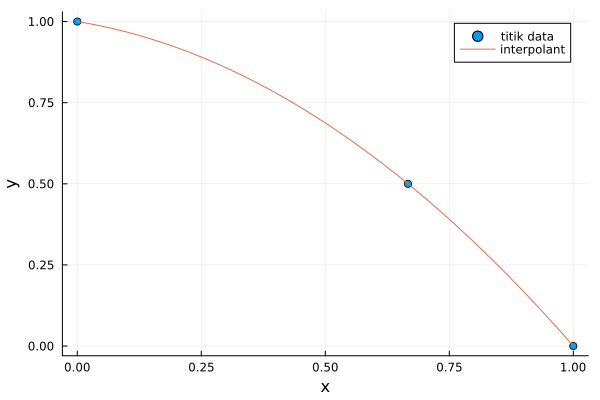

In [11]:
scatter(x, y, label="titik data",
    xlabel="x",
    ylabel="y"
)
plot!(xx, yy, label="interpolant")